In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Memuat Dataset Iris
#    Dataset dimuat ke dalam DataFrame pandas.
iris_df = pd.read_csv('../data/Iris.csv')
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [20]:
#identifikasi nilai species
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

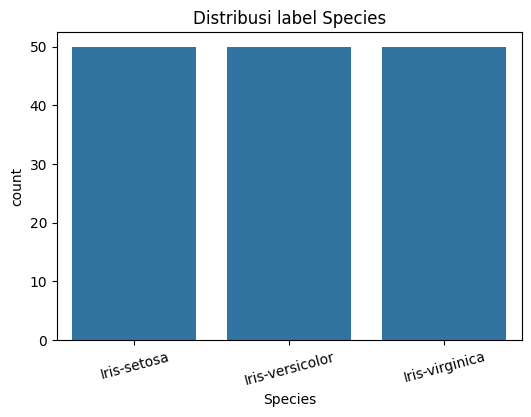

In [21]:
# Melihat Distribusi data spesies
plt.figure(figsize=(6,4))
sns.countplot(x='Species', data=iris_df)
plt.title('Distribusi label Species')
plt.xticks(rotation=15)
plt.show()

In [22]:
# mapping label -> kode untuk target
Species_cat = iris_df['Species'].astype('category')
Species_classes = list(Species_cat.cat.categories) # urutan kelas
iris_df['Species'] = Species_cat.cat.codes # y numerik


iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


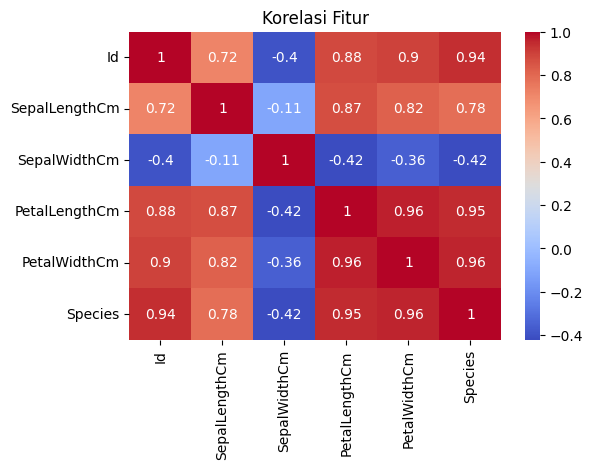

In [23]:
# melihat Korelasi untuk memilih fitur
plt.figure(figsize=(6,4))
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

Akurasi Model Decision Tree (80/20 split): 100.00%


Text(0.5, 1.0, 'Visualisasi Decision Tree untuk Dataset Iris (80/20 Split)')

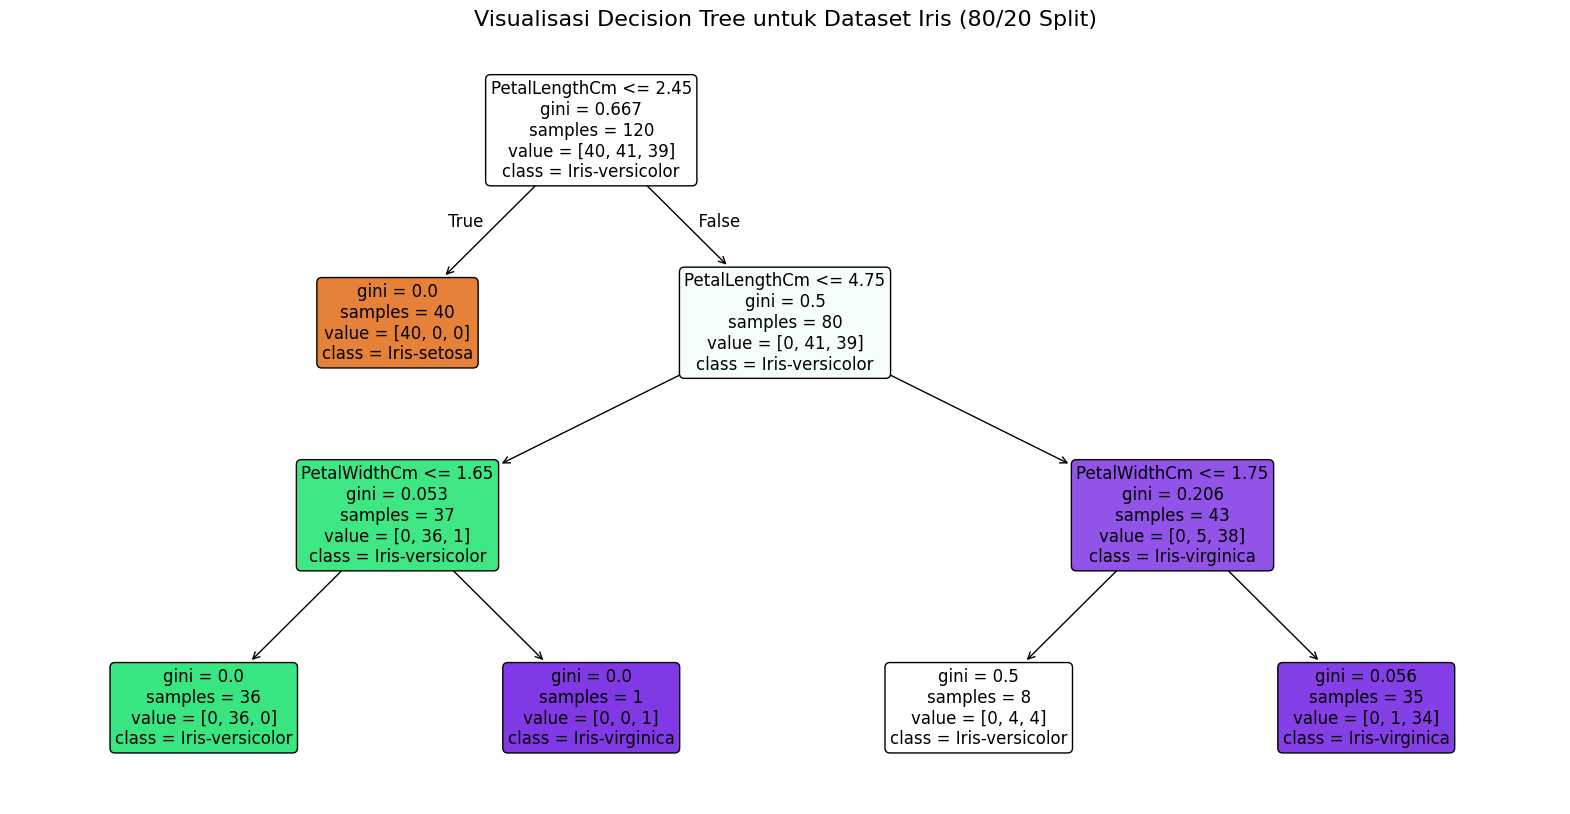

In [26]:
iris_df = pd.read_csv('../data/Iris.csv')

# 2. Preprocessing: Menghapus Kolom 'Id'
if 'Id' in iris_df.columns:
    iris_df = iris_df.drop('Id', axis=1)


# 3. Memisahkan Fitur dan Target
X = iris_df.drop('Species', axis=1)
y = iris_df['Species']

# 4. Membagi Data Latih (80%) dan Data Uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Membuat dan Melatih Model Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_classifier.fit(X_train, y_train)

# 6. Melakukan Prediksi dan Evaluasi Model
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model Decision Tree (80/20 split): {accuracy * 100:.2f}%")

# 7. Visualisasi Decision Tree 
plt.figure(figsize=(20,10))
plot_tree(dt_classifier,
          feature_names=X.columns,
          class_names=y.unique(),
          filled=True, 
          rounded=True,
          fontsize=12)
plt.title("Visualisasi Decision Tree untuk Dataset Iris (80/20 Split)", fontsize=16)